In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [6]:
sy = pd.Series(cancer.target, dtype="category")
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

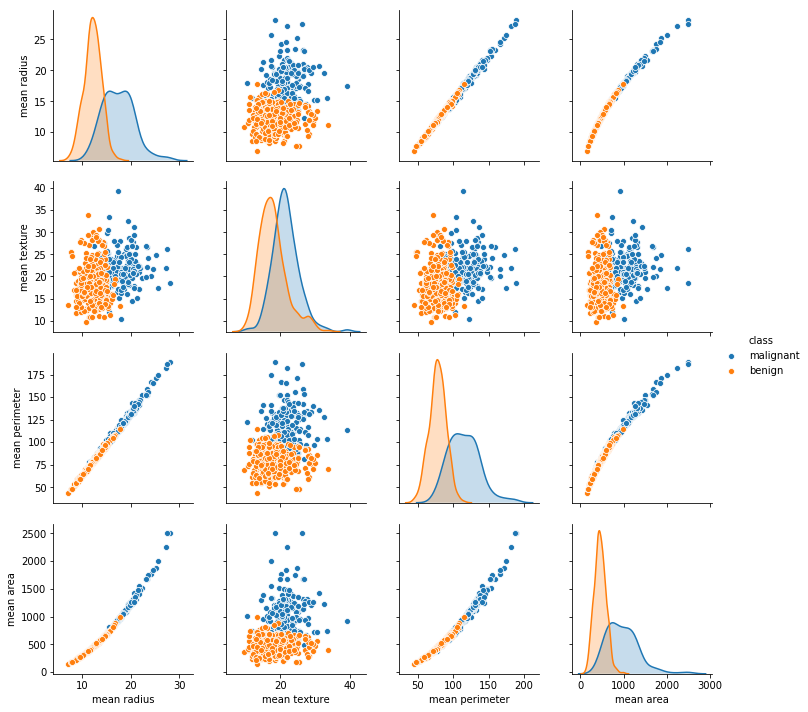

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(vars=["mean radius", "mean texture", "mean perimeter", "mean area"], 
             hue="class", data=df)
plt.show()

In [9]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [10]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [32]:
x = df.values
X = x[:, 0:4]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [40]:
model = Sequential()
model.add(Dense(90, input_dim=4, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [43]:
modelpath = "./model/model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor="val_loss", 
                               verbose=1, 
                               save_best_only=True)

In [44]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [45]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=2000, batch_size=500, 
                    callbacks=[checkpointer, early_stopping_callback])

Train on 318 samples, validate on 80 samples
Epoch 1/2000
318/318 [==============================] - 0s 1ms/step - loss: 5.8656 - acc: 0.6321 - val_loss: 5.7007 - val_acc: 0.6000

Epoch 00001: val_loss improved from inf to 5.70066, saving model to ./model/model.hdf5
Epoch 2/2000
318/318 [==============================] - 0s 11us/step - loss: 5.1390 - acc: 0.6321 - val_loss: 1.0710 - val_acc: 0.4625

Epoch 00002: val_loss improved from 5.70066 to 1.07100, saving model to ./model/model.hdf5
Epoch 3/2000
318/318 [==============================] - 0s 13us/step - loss: 1.0749 - acc: 0.4308 - val_loss: 1.0676 - val_acc: 0.6000

Epoch 00003: val_loss improved from 1.07100 to 1.06759, saving model to ./model/model.hdf5
Epoch 4/2000
318/318 [==============================] - 0s 17us/step - loss: 0.9786 - acc: 0.6321 - val_loss: 0.6017 - val_acc: 0.6125

Epoch 00004: val_loss improved from 1.06759 to 0.60171, saving model to ./model/model.hdf5
Epoch 5/2000
318/318 [==============================

In [46]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

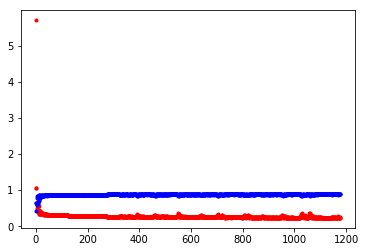

In [47]:
import matplotlib.pyplot as plt
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [49]:
del model

In [50]:
model = load_model('model/model.hdf5')

In [51]:
print("Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

171/171 [==============================] - 0s 594us/step
Accuracy: 0.9064
